In [80]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, Conv2D, MaxPooling2D,GlobalMaxPooling1D,Conv1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [81]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
x_train = x_train / 255.0
x_test = x_test / 255.0





(60000, 28, 28) (60000,)


In [82]:
y_train.shape

(60000,)

In [83]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')

# LSTM

In [84]:
def createLSTM():
    model = Sequential()
    model.add(LSTM(128, input_shape=(28,28), activation='relu', return_sequences=True))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))
    return model

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 28, 128)           80384     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                330       
Total params: 84,842
Trainable params: 84,842
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 32s 535u

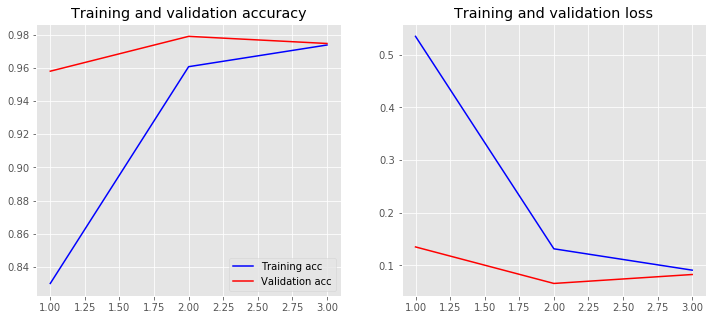

In [85]:
model = createLSTM()
model.summary()
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))
plot_history(history)

In [86]:
#adding channel dimension in order to do spatial 
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# CNN

In [87]:
def createCNN():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding= "Same", activation='relu',input_shape =(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(10, activation='softmax'))
    return model
    
    

#     model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                      activation ='relu', input_shape = (28,28,1)))
#     model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                      activation ='relu'))
#     model.add(MaxPool2D(pool_size=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                      activation ='relu'))
#     model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                      activation ='relu'))
#     model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#     model.add(Dropout(0.25))


#     model.add(Flatten())
#     model.add(Dense(256, activation = "relu"))
#     model.add(Dropout(0.5))
#     model.add(Dense(10, activation = "softmax"))
#     return model

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               1605888   
_________________________________________________________________
dense_47 (Dense)             (None, 10)                2570      
Total params: 1,608,778
Trainable params: 1,608,778
Non-trainable params: 0
___________________________________________

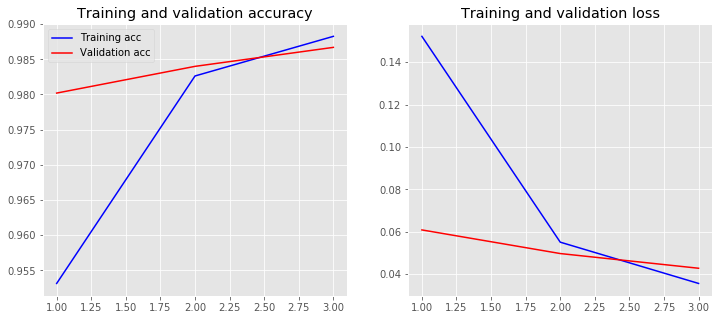

In [88]:
model = createCNN()
model.summary()
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))
plot_history(history)

In [21]:
x_train.shape[1:]

(28, 28)